# Auto Insurance Analysis

## Exploratory Data Analysis

## Project Goal

## Summary of Data

### Library Import

In [1]:
#Import libraries
%run ../python_files/imports

## Data Import and Data Exploration

In [2]:
# import auto insurance data

# change values with empty spaces in the dataset to NaN values
auto_insurance_data = pd.read_csv('../data/auto_insurance_data.csv')

# change column names to lower-case
auto_insurance_data.columns = [i.lower() for i in auto_insurance_data.columns]

# quick overview of the dataset
auto_insurance_data

,crash,crash_cost,kidsdriv,age,homekids,yoj,income,parent1,home_val,mstatus,sex,education,job,travtime,car_use,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,car_age,urbanicity
0,0,0.0,0,60,0,11,67349.381620,No,0.0000,No,M,PhD,Professional,13.950586,Private,14230,11,Minivan,yes,4461,2,No,3,18,Highly Urban/ Urban
1,0,0.0,0,43,0,11,91449.254640,No,257251.6354,No,M,High School,Blue Collar,21.943209,Commercial,14940,1,Minivan,yes,0,0,No,0,1,Highly Urban/ Urban
2,0,0.0,0,35,1,10,16038.587100,No,124190.7529,Yes,F,High School,Clerical,5.000000,Private,4010,4,SUV,no,38690,2,No,3,10,Highly Urban/ Urban
3,1,2946.0,0,34,1,12,125301.242500,Yes,0.0000,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430,1,Sports Car,no,0,0,No,0,7,Highly Urban/ Urban
4,1,2501.0,0,34,0,10,62977.824160,No,0.0000,No,F,Bachelors,Clerical,33.639949,Private,11200,1,SUV,no,0,0,No,0,1,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039,0,0.0,0,41,0,7,6255.902602,No,0.0000,No,M,High School,Student,40.664049,Private,5600,1,Pickup,no,0,0,No,0,7,Highly Rural
6040,0,0.0,0,35,0,11,43111.840100,No,0.0000,No,M,High School,Blue Collar,50.996441,Commercial,27330,10,Panel Truck,yes,0,0,No,0,8,Highly Rural
6041,0,0.0,1,45,2,9,164668.837000,No,386273.4090,Yes,M,PhD,Manager,21.267951,Private,13270,15,Minivan,no,0,0,No,2,17,Highly Urban/ Urban
6042,0,0.0,0,50,0,7,43445.497870,No,149247.7801,Yes,F,Bachelors,Home Maker,36.170517,Private,22550,6,Minivan,no,0,0,No,0,11,Highly Urban/ Urban


After a quick overview of the dataset, we see that we are working with 6043 total observations and 25 different variables. The response variable we will be using is Crash, which indicates whether a car was in a crash or not. The remaining 24 variables will be used as explanatory variables. We also notice a good mix of continuous and categorical variables.

In [3]:
# quick review of the variables in the dataset
auto_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 25 columns):
crash         6044 non-null int64
crash_cost    6044 non-null float64
kidsdriv      6044 non-null int64
age           6044 non-null int64
homekids      6044 non-null int64
yoj           6044 non-null int64
income        6044 non-null float64
parent1       6044 non-null object
home_val      6044 non-null float64
mstatus       6044 non-null object
sex           6044 non-null object
education     6044 non-null object
job           6044 non-null object
travtime      6044 non-null float64
car_use       6044 non-null object
bluebook      6044 non-null int64
tif           6044 non-null int64
car_type      6044 non-null object
red_car       6044 non-null object
oldclaim      6044 non-null int64
clm_freq      6044 non-null int64
revoked       6044 non-null object
mvr_pts       6044 non-null int64
car_age       6044 non-null int64
urbanicity    6044 non-null object
dtypes: float64(4), int64

For modeling purposes, we know that we will have to convert all categorical variables to dummy variables. As we can see above, there are 10 categorical variables that will need to go through this conversion.

In [4]:
# quick review of the characteristics of our current continuous variables in the dataset
auto_insurance_data.describe()

,crash,crash_cost,kidsdriv,age,homekids,yoj,income,home_val,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,car_age
count,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000
mean,0.264891,1479.664479,0.173230,44.628061,0.743547,10.494375,58178.583187,150091.831763,33.695527,15235.584050,5.360523,3999.992058,0.783752,1.699868,7.922733
std,0.441312,4553.548768,0.515462,8.708472,1.132793,4.138805,43830.436426,123736.396505,15.889558,8041.627756,4.144970,8815.064402,1.153627,2.158059,5.582574
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,26745.589935,0.000000,22.800199,9170.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,51624.202055,159147.432550,33.016349,14080.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,1.000000,1036.250000,0.000000,51.000000,1.000000,13.000000,81289.165560,233060.839575,43.945989,20120.000000,7.000000,4540.000000,2.000000,3.000000,12.000000
max,1.000000,85523.653350,4.000000,81.000000,5.000000,23.000000,367030.262000,885282.345000,142.120630,65970.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


We notice above that there is a large range between some of our observations. However, it is not appropriate to dismiss these as outliers, as we do not want to skew or create bias within our dataset. Also, above we cannot view the descriptions of our 10 categorical variables until we convert them to continous variables.

In [5]:
# check the number of NaN values in the dataset
auto_insurance_data.isna().sum()

crash         0
crash_cost    0
kidsdriv      0
age           0
homekids      0
yoj           0
income        0
parent1       0
home_val      0
mstatus       0
sex           0
education     0
job           0
travtime      0
car_use       0
bluebook      0
tif           0
car_type      0
red_car       0
oldclaim      0
clm_freq      0
revoked       0
mvr_pts       0
car_age       0
urbanicity    0
dtype: int64

Fortunately, we see above that our dataset does not contain any missing values, so we will not need to worry about imputation.

## Data Transformations

In [6]:
# Create dummy values for the categorical variables

auto_df = pd.get_dummies(data = auto_insurance_data)
auto_df

,crash,crash_cost,kidsdriv,age,homekids,yoj,income,home_val,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,car_age,parent1_No,parent1_Yes,mstatus_No,mstatus_Yes,sex_F,sex_M,education_<High School,education_Bachelors,education_High School,education_Masters,education_PhD,job_Blue Collar,job_Clerical,job_Doctor,job_Home Maker,job_Lawyer,job_Manager,job_Professional,job_Student,car_use_Commercial,car_use_Private,car_type_Minivan,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_no,red_car_yes,revoked_No,revoked_Yes,urbanicity_Highly Rural,urbanicity_Highly Urban/ Urban
0,0,0.0,0,60,0,11,67349.381620,0.0000,13.950586,14230,11,4461,2,3,18,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1
1,0,0.0,0,43,0,11,91449.254640,257251.6354,21.943209,14940,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1
2,0,0.0,0,35,1,10,16038.587100,124190.7529,5.000000,4010,4,38690,2,3,10,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
3,1,2946.0,0,34,1,12,125301.242500,0.0000,45.703013,17430,1,0,0,0,7,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1
4,1,2501.0,0,34,0,10,62977.824160,0.0000,33.639949,11200,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039,0,0.0,0,41,0,7,6255.902602,0.0000,40.664049,5600,1,0,0,0,7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0
6040,0,0.0,0,35,0,11,43111.840100,0.0000,50.996441,27330,10,0,0,0,8,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6041,0,0.0,1,45,2,9,164668.837000,386273.4090,21.267951,13270,15,0,0,2,17,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1
6042,0,0.0,0,50,0,7,43445.497870,149247.7801,36.170517,22550,6,0,0,0,11,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1


In [7]:
# Log Transformations



In [8]:
# quick review of the characteristics of all variables in the dataset, 
# including the new dummy variables and log-transformed variables
auto_df.describe()

,crash,crash_cost,kidsdriv,age,homekids,yoj,income,home_val,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,car_age,parent1_No,parent1_Yes,mstatus_No,mstatus_Yes,sex_F,sex_M,education_<High School,education_Bachelors,education_High School,education_Masters,education_PhD,job_Blue Collar,job_Clerical,job_Doctor,job_Home Maker,job_Lawyer,job_Manager,job_Professional,job_Student,car_use_Commercial,car_use_Private,car_type_Minivan,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_no,red_car_yes,revoked_No,revoked_Yes,urbanicity_Highly Rural,urbanicity_Highly Urban/ Urban
count,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000
mean,0.264891,1479.664479,0.173230,44.628061,0.743547,10.494375,58178.583187,150091.831763,33.695527,15235.584050,5.360523,3999.992058,0.783752,1.699868,7.922733,0.863997,0.136003,0.404864,0.595136,0.555592,0.444408,0.158008,0.287723,0.309729,0.175546,0.068994,0.244209,0.170582,0.033091,0.080079,0.110854,0.128888,0.143448,0.088848,0.337525,0.662475,0.281436,0.057412,0.167604,0.294672,0.118134,0.080741,0.720218,0.279782,0.876737,0.123263,0.215089,0.784911
std,0.441312,4553.548768,0.515462,8.708472,1.132793,4.138805,43830.436426,123736.396505,15.889558,8041.627756,4.144970,8815.064402,1.153627,2.158059,5.582574,0.342820,0.342820,0.490906,0.490906,0.496941,0.496941,0.364779,0.452739,0.462420,0.380465,0.253465,0.429653,0.376175,0.178888,0.271439,0.313977,0.335104,0.350558,0.284548,0.472905,0.472905,0.449737,0.232648,0.373545,0.455933,0.322793,0.272460,0.448929,0.448929,0.328766,0.328766,0.410918,0.410918
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,26745.589935,0.000000,22.800199,9170.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,51624.202055,159147.432550,33.016349,14080.000000,4.000000,0.000000,0.000000,1.000000,8.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1036.250000,0.000000,51.000000,1.000000,13.000000,81289.165560,233060.839575,43.945989,20120.000000,7.000000,4540.000000,2.000000,3.000000,12.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,85523.653350,4.000000,81.000000,5.000000,23.000000,367030.262000,885282.345000,14

## Initial Train and Test Dataset Creation

In [9]:
#Split auto_insurance_df into train and test datasets for our logistic and linear regression models

#'features' will be used in both models
features = auto_df.drop(['crash', 'crash_cost'], axis = 1)

#train and test datasets for logistic regression model
crash = auto_df['crash']
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(features, crash, test_size = 0.2, random_state = 10)

#train and test datasets for simple linear regression model
crash_cost = auto_df['crash_cost']
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(features, crash_cost, test_size = 0.2, random_state = 10)

## Data Exploration

In [10]:
# Correlations for logistic regression model
x_train_log.corr(method = 'pearson')

,kidsdriv,age,homekids,yoj,income,home_val,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,car_age,parent1_No,parent1_Yes,mstatus_No,mstatus_Yes,sex_F,sex_M,education_<High School,education_Bachelors,education_High School,education_Masters,education_PhD,job_Blue Collar,job_Clerical,job_Doctor,job_Home Maker,job_Lawyer,job_Manager,job_Professional,job_Student,car_use_Commercial,car_use_Private,car_type_Minivan,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_no,red_car_yes,revoked_No,revoked_Yes,urbanicity_Highly Rural,urbanicity_Highly Urban/ Urban
kidsdriv,1.000000,-0.063364,0.451814,0.052355,-0.037662,-0.017041,0.006435,-0.003084,-0.007567,0.023975,0.043437,0.060789,-0.055615,-0.186169,0.186169,-0.044507,0.044507,0.047705,-0.047705,0.032431,-0.010813,0.045942,-0.044244,-0.044488,0.049412,0.027115,-0.042888,0.002215,-0.051216,-0.025029,-0.016089,0.020654,0.022993,-0.022993,-0.016495,0.000415,0.014739,0.029687,-0.010187,-0.030537,0.035023,-0.035023,-0.031333,0.031333,0.041156,-0.041156
age,-0.063364,1.000000,-0.444656,0.132738,0.186302,0.213615,0.001562,0.143708,-0.009022,-0.024907,-0.028836,-0.072548,0.189864,0.321977,-0.321977,-0.097775,0.097775,-0.062243,0.062243,-0.124014,0.001876,-0.123091,0.167059,0.148229,-0.060599,-0.152140,0.121951,0.008324,0.140968,0.101548,0.053658,-0.136292,-0.084173,0.084173,0.011899,0.010395,-0.042427,-0.023412,0.035647,0.026015,-0.018736,0.018736,0.038876,-0.038876,-0.054565,0.054565
homekids,0.451814,-0.444656,1.000000,0.098026,-0.145450,-0.105395,-0.010233,-0.083472,0.002154,0.041367,0.037195,0.070947,-0.153779,-0.452801,0.452801,-0.044290,0.044290,0.111091,-0.111091,0.125242,-0.031090,0.095497,-0.136041,-0.093945,0.052970,0.120998,-0.089784,0.006157,-0.108862,-0.089020,-0.075520,0.131271,0.044199,-0.044199,-0.051609,-0.026208,-0.002976,0.075629,0.028832,-0.048067,0.075337,-0.075337,-0.046906,0.046906,0.059459,-0.059459
yoj,0.052355,0.132738,0.098026,1.000000,0.299695,0.265340,-0.034313,0.146448,0.031436,0.004739,-0.022381,-0.030223,0.052115,0.041845,-0.041845,-0.127025,0.127025,-0.067369,0.067369,-0.045910,0.032666,-0.047514,0.055620,0.011045,0.136760,0.108802,0.031814,-0.330425,0.069307,0.075744,0.082881,-0.324677,0.018433,-0.018433,0.060927,0.029859,-0.007700,-0.055967,-0.054463,0.042064,-0.044518,0.044518,0.001899,-0.001899,-0.086742,0.086742
income,-0.037662,0.186302,-0.145450,0.299695,1.000000,0.584057,-0.057494,0.393978,0.006241,-0.034466,-0.060801,-0.076260,0.382189,0.064002,-0.064002,0.016065,-0.016065,-0.064422,0.064422,-0.318508,0.119690,-0.287582,0.250050,0.387438,0.010567,-0.248975,0.303061,-0.308478,0.231105,0.259363,0.176720,-0.370327,-0.014377,0.014377,0.094374,0.115477,-0.075584,-0.106245,-0.079698,0.120070,-0.039554,0.039554,0.020864,-0.020864,-0.216395,0.216395
home_val,-0.017041,0.213615,-0.105395,0.265340,0.584057,1.000000,-0.037857,0.248141,-0.006005,-0.062933,-0.104398,-0.097719,0.195567,0.255503,-0.255503,-0.468005,0.468005,-0.041734,0.041734,-0.193736,0.086636,-0.168413,0.161038,0.186518,0.035161,-0.114821,0.146241,-0.151285,0.141183,0.143880,0.129887,-0.339066,-0.027317,0.027317,0.057177,0.068042,-0.044016,-0.060312,-0.051485,0.069026,-0.002793,0.002793,0.049007,-0.049007,-0.109349,0.109349
travtime,0.006435,0.001562,-0.010233,-0.034313,-0.057494,-0.037857,1.000000,-0.026569,-0.014641,-0.019944,0.009032,-0.001958,-0.029095,0.016936,-0.016936,-0.013750,0.013750,0.015572,-0.015572,0.028721,0.003668,0.018654,-0.042023,-0.018984,0.044861,-0.000189,-0.012815,0.040817,-0.032131,-0.074806,-0.005983,0.034018,0.018841,-0.018841,-0.005745,-0.011308,-0.004019,0.004793,0.025205,-0.013336,-0.006288,0.006288,0.012092,-0.012092,0.157708,-0.157708
bluebook,-0.003084,0.143708,-0.083472,0.146448,0.393978,0.248141,-0.026569,1.000000,0.001954,-0.035781,-0.045597,-0.056151,0.138971,0.044547,-0.044547,-0.015260,0.015260,-0.021167,0.021167,-0.128743,0.078636,-0.122268,0.092449,0.126632,0.003893,-0.105577,0.085936,-0.118256,0.048448,0.134085,0.129979

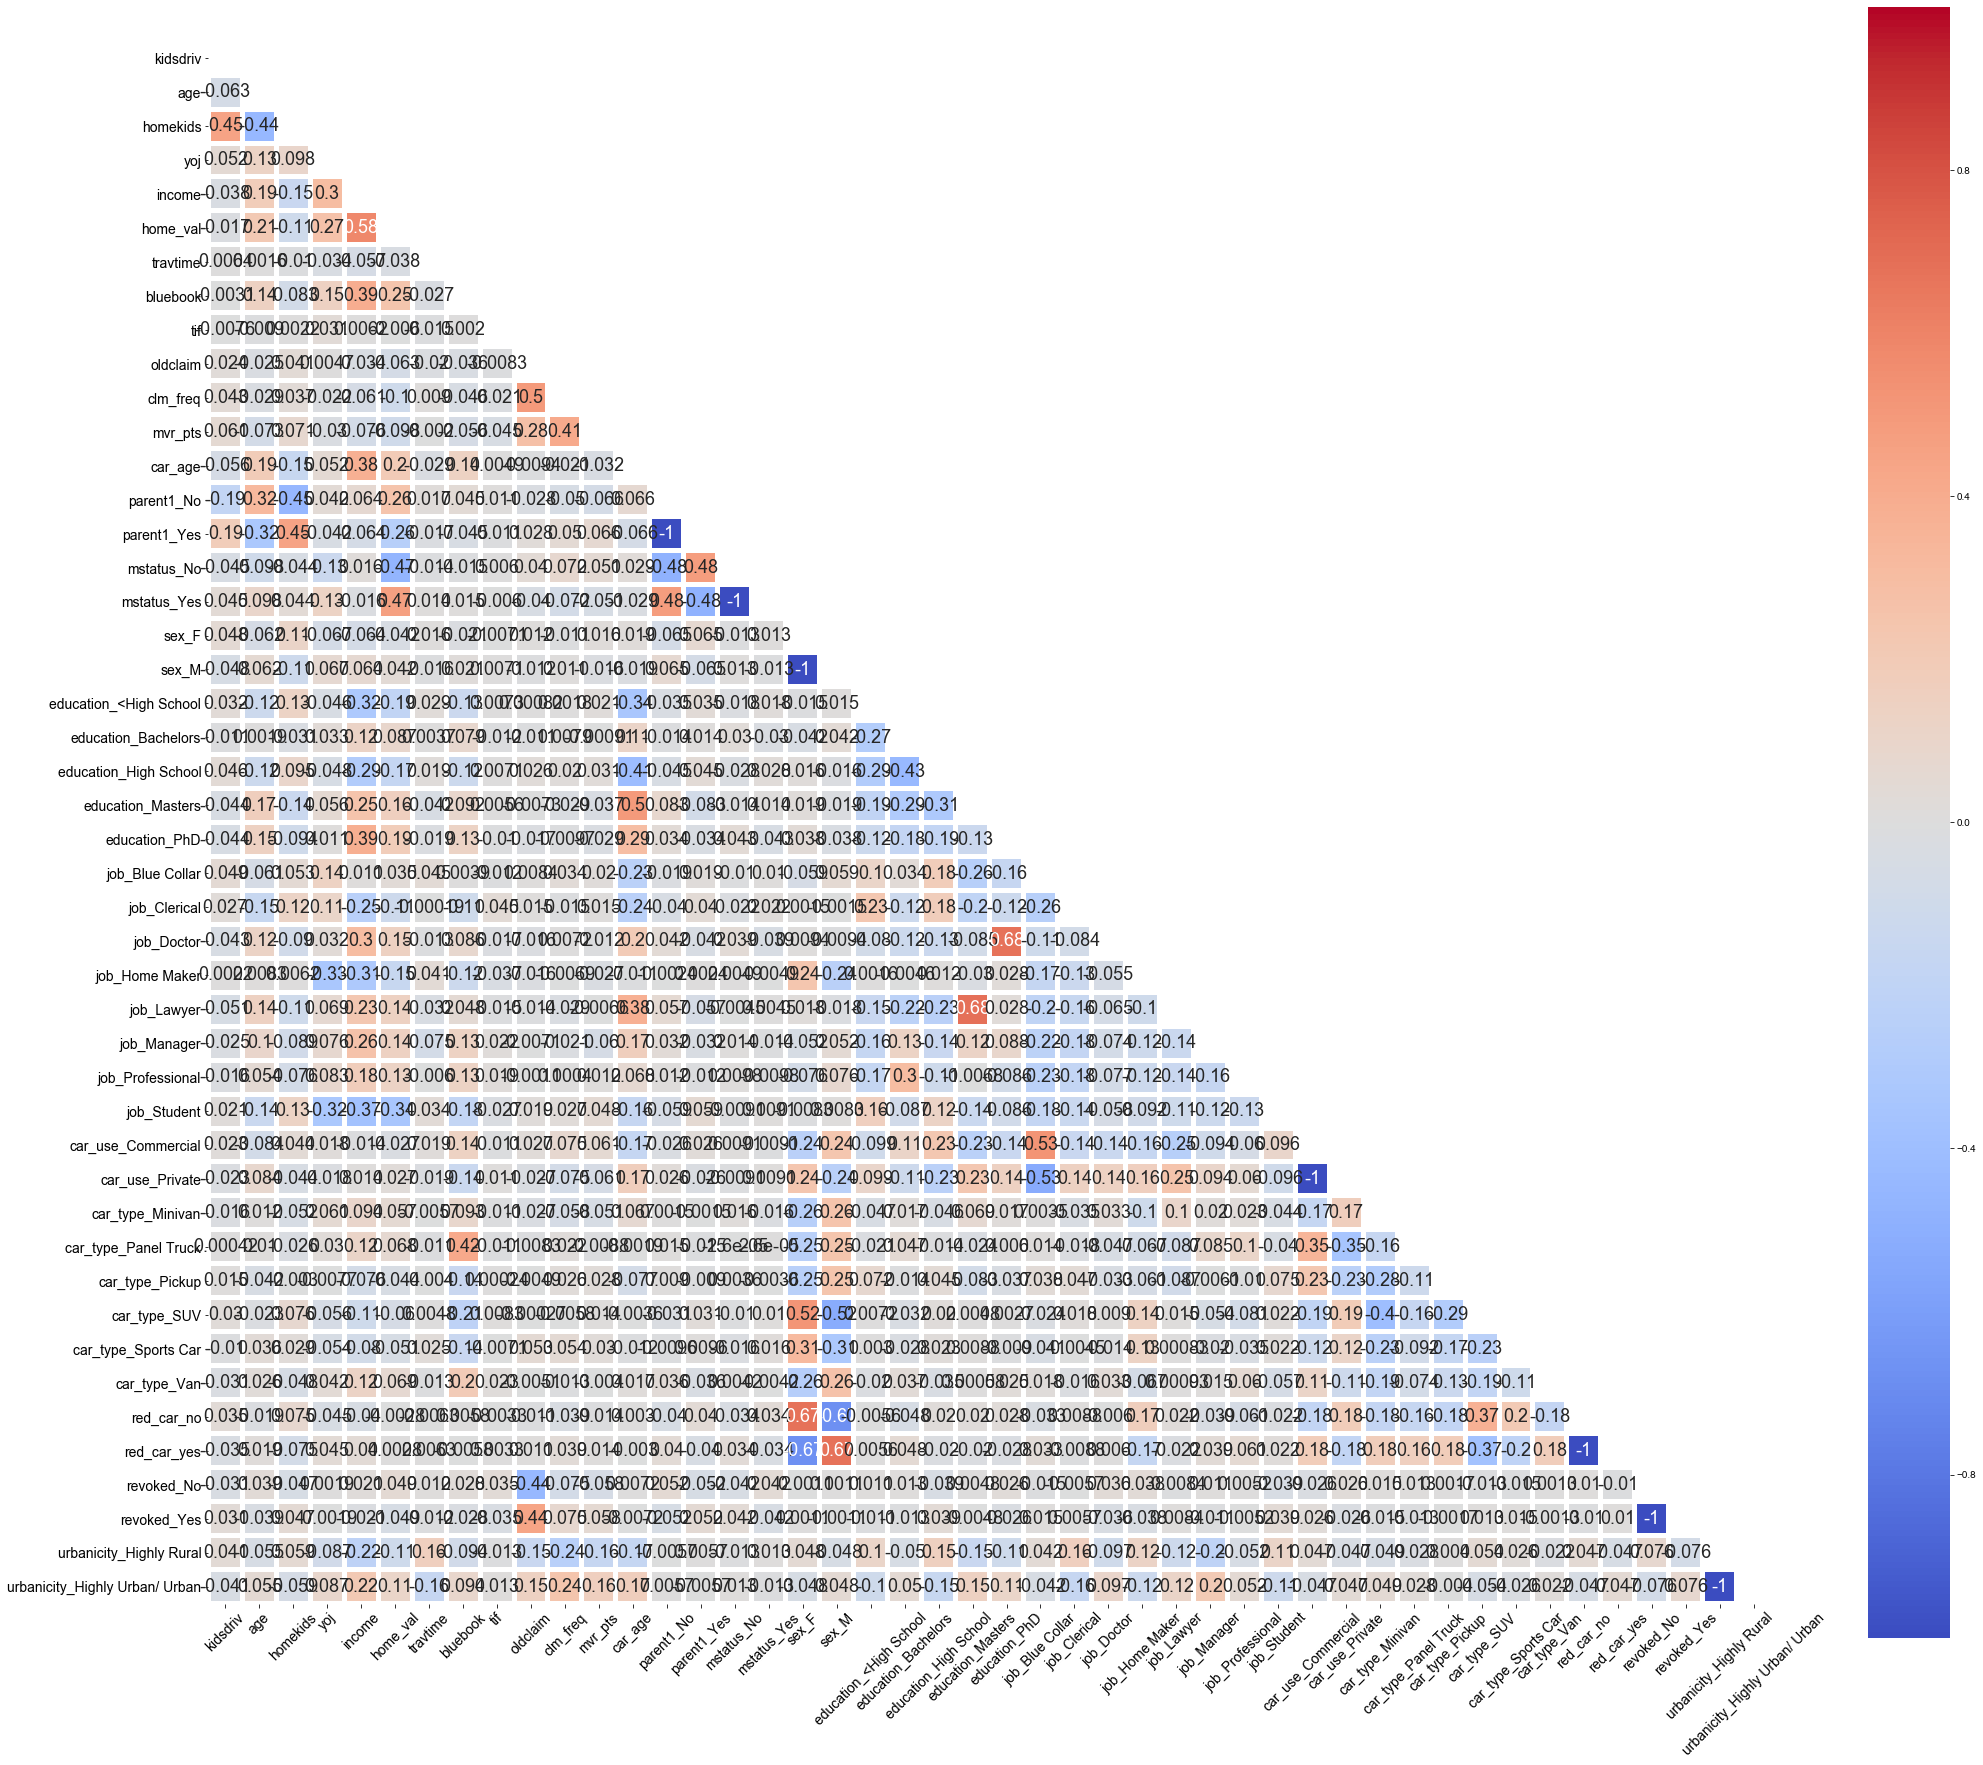

In [11]:
#Correlation Heatmap for logistic regression model

mask = np.zeros_like(x_train_log.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(35,30))
ax = sns.heatmap(x_train_log.corr(method='pearson'), cmap="coolwarm", mask=mask, annot=True, annot_kws={"size": 18}, square=True, linewidths=4)
sns.set_style('white')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.ylabel(ylabel=' ', labelpad=100)
plt.show()

In [12]:
# Correlations for simple linear regression model
x_train_lin.corr(method = 'pearson')

,kidsdriv,age,homekids,yoj,income,home_val,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,car_age,parent1_No,parent1_Yes,mstatus_No,mstatus_Yes,sex_F,sex_M,education_<High School,education_Bachelors,education_High School,education_Masters,education_PhD,job_Blue Collar,job_Clerical,job_Doctor,job_Home Maker,job_Lawyer,job_Manager,job_Professional,job_Student,car_use_Commercial,car_use_Private,car_type_Minivan,car_type_Panel Truck,car_type_Pickup,car_type_SUV,car_type_Sports Car,car_type_Van,red_car_no,red_car_yes,revoked_No,revoked_Yes,urbanicity_Highly Rural,urbanicity_Highly Urban/ Urban
kidsdriv,1.000000,-0.063364,0.451814,0.052355,-0.037662,-0.017041,0.006435,-0.003084,-0.007567,0.023975,0.043437,0.060789,-0.055615,-0.186169,0.186169,-0.044507,0.044507,0.047705,-0.047705,0.032431,-0.010813,0.045942,-0.044244,-0.044488,0.049412,0.027115,-0.042888,0.002215,-0.051216,-0.025029,-0.016089,0.020654,0.022993,-0.022993,-0.016495,0.000415,0.014739,0.029687,-0.010187,-0.030537,0.035023,-0.035023,-0.031333,0.031333,0.041156,-0.041156
age,-0.063364,1.000000,-0.444656,0.132738,0.186302,0.213615,0.001562,0.143708,-0.009022,-0.024907,-0.028836,-0.072548,0.189864,0.321977,-0.321977,-0.097775,0.097775,-0.062243,0.062243,-0.124014,0.001876,-0.123091,0.167059,0.148229,-0.060599,-0.152140,0.121951,0.008324,0.140968,0.101548,0.053658,-0.136292,-0.084173,0.084173,0.011899,0.010395,-0.042427,-0.023412,0.035647,0.026015,-0.018736,0.018736,0.038876,-0.038876,-0.054565,0.054565
homekids,0.451814,-0.444656,1.000000,0.098026,-0.145450,-0.105395,-0.010233,-0.083472,0.002154,0.041367,0.037195,0.070947,-0.153779,-0.452801,0.452801,-0.044290,0.044290,0.111091,-0.111091,0.125242,-0.031090,0.095497,-0.136041,-0.093945,0.052970,0.120998,-0.089784,0.006157,-0.108862,-0.089020,-0.075520,0.131271,0.044199,-0.044199,-0.051609,-0.026208,-0.002976,0.075629,0.028832,-0.048067,0.075337,-0.075337,-0.046906,0.046906,0.059459,-0.059459
yoj,0.052355,0.132738,0.098026,1.000000,0.299695,0.265340,-0.034313,0.146448,0.031436,0.004739,-0.022381,-0.030223,0.052115,0.041845,-0.041845,-0.127025,0.127025,-0.067369,0.067369,-0.045910,0.032666,-0.047514,0.055620,0.011045,0.136760,0.108802,0.031814,-0.330425,0.069307,0.075744,0.082881,-0.324677,0.018433,-0.018433,0.060927,0.029859,-0.007700,-0.055967,-0.054463,0.042064,-0.044518,0.044518,0.001899,-0.001899,-0.086742,0.086742
income,-0.037662,0.186302,-0.145450,0.299695,1.000000,0.584057,-0.057494,0.393978,0.006241,-0.034466,-0.060801,-0.076260,0.382189,0.064002,-0.064002,0.016065,-0.016065,-0.064422,0.064422,-0.318508,0.119690,-0.287582,0.250050,0.387438,0.010567,-0.248975,0.303061,-0.308478,0.231105,0.259363,0.176720,-0.370327,-0.014377,0.014377,0.094374,0.115477,-0.075584,-0.106245,-0.079698,0.120070,-0.039554,0.039554,0.020864,-0.020864,-0.216395,0.216395
home_val,-0.017041,0.213615,-0.105395,0.265340,0.584057,1.000000,-0.037857,0.248141,-0.006005,-0.062933,-0.104398,-0.097719,0.195567,0.255503,-0.255503,-0.468005,0.468005,-0.041734,0.041734,-0.193736,0.086636,-0.168413,0.161038,0.186518,0.035161,-0.114821,0.146241,-0.151285,0.141183,0.143880,0.129887,-0.339066,-0.027317,0.027317,0.057177,0.068042,-0.044016,-0.060312,-0.051485,0.069026,-0.002793,0.002793,0.049007,-0.049007,-0.109349,0.109349
travtime,0.006435,0.001562,-0.010233,-0.034313,-0.057494,-0.037857,1.000000,-0.026569,-0.014641,-0.019944,0.009032,-0.001958,-0.029095,0.016936,-0.016936,-0.013750,0.013750,0.015572,-0.015572,0.028721,0.003668,0.018654,-0.042023,-0.018984,0.044861,-0.000189,-0.012815,0.040817,-0.032131,-0.074806,-0.005983,0.034018,0.018841,-0.018841,-0.005745,-0.011308,-0.004019,0.004793,0.025205,-0.013336,-0.006288,0.006288,0.012092,-0.012092,0.157708,-0.157708
bluebook,-0.003084,0.143708,-0.083472,0.146448,0.393978,0.248141,-0.026569,1.000000,0.001954,-0.035781,-0.045597,-0.056151,0.138971,0.044547,-0.044547,-0.015260,0.015260,-0.021167,0.021167,-0.128743,0.078636,-0.122268,0.092449,0.126632,0.003893,-0.105577,0.085936,-0.118256,0.048448,0.134085,0.129979

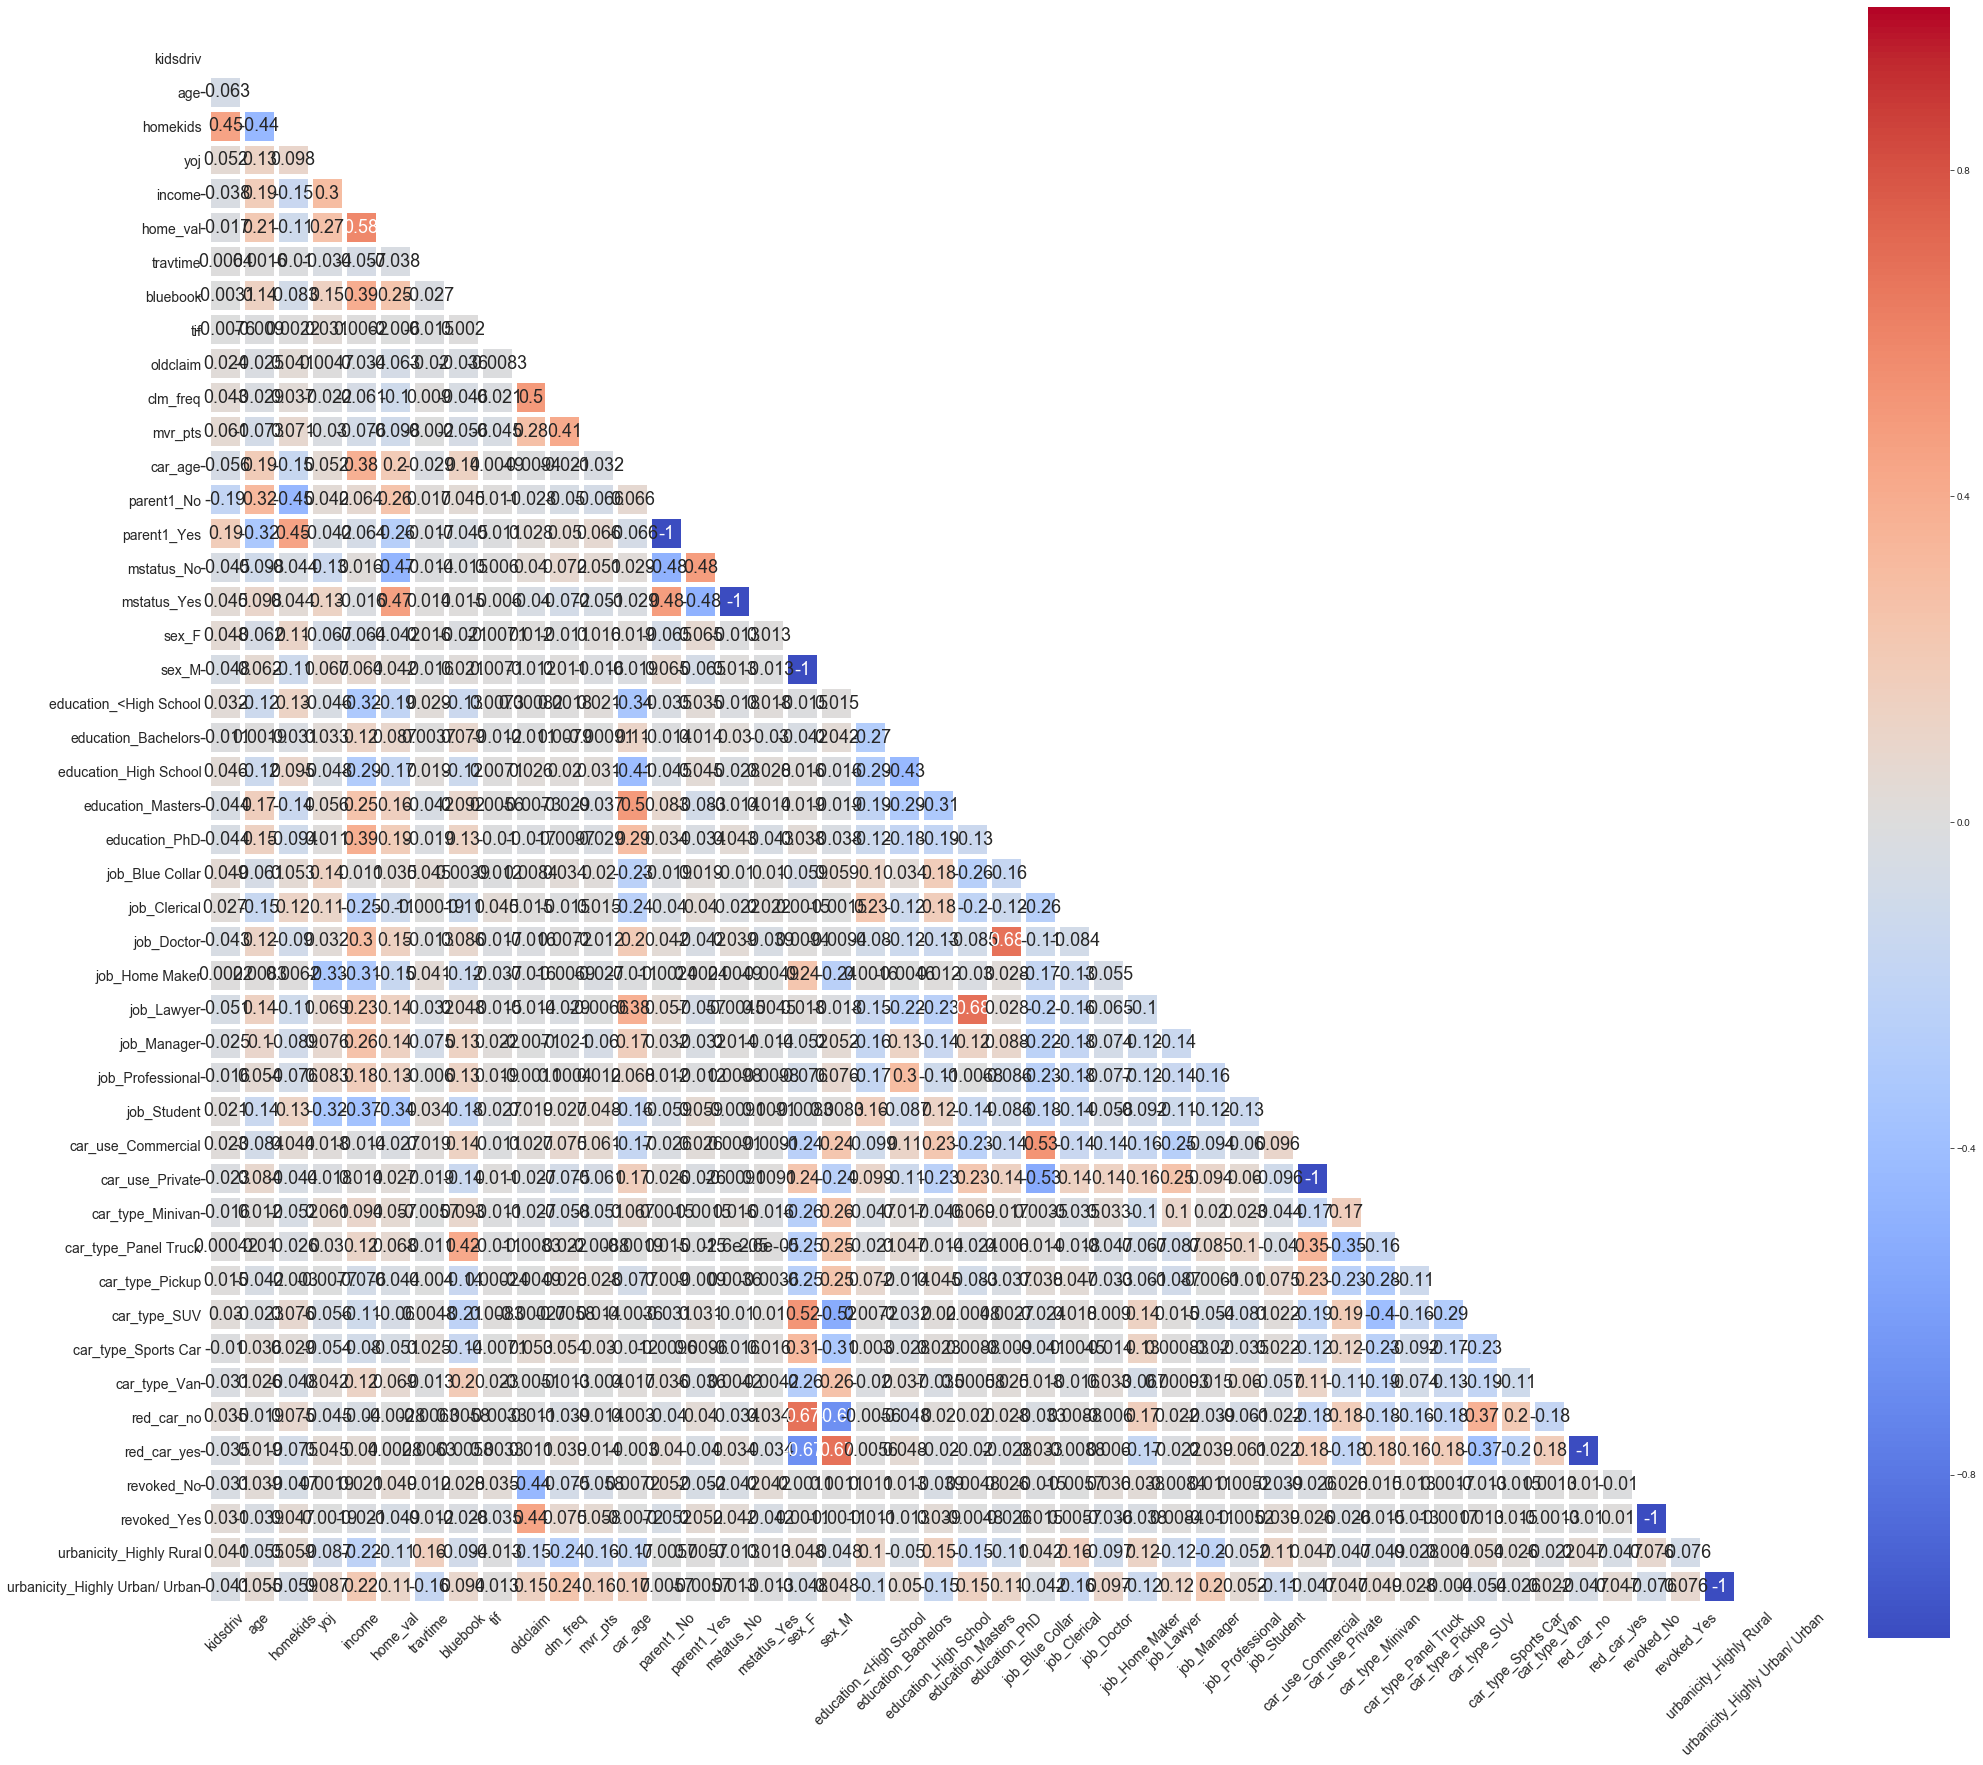

In [13]:
#Correlation Heatmap for simple linear regression model

mask = np.zeros_like(x_train_lin.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(35,30))
ax = sns.heatmap(x_train_lin.corr(method='pearson'), cmap="coolwarm", mask=mask, annot=True, annot_kws={"size": 18}, square=True, linewidths=4)
sns.set_style('white')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.ylabel(ylabel=' ', labelpad=100)
plt.show()

## Feature Selection

### Recursive Feature Elimination for Logistic Regression Model

In [14]:
logreg_model = LogisticRegression()
rfecv_log = RFECV(estimator=logreg_model, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv_log.fit(x_train_log, y_train_log)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [15]:
feature_importance_log = list(zip(features, rfecv_log.support_))
new_features_log = []
for key,value in enumerate(feature_importance_log):
    if(value[1]) == True:
        new_features_log.append(value[0])
        
print(new_features_log)

['kidsdriv', 'age', 'homekids', 'yoj', 'income', 'home_val', 'travtime', 'bluebook', 'tif', 'oldclaim', 'clm_freq', 'mvr_pts', 'car_age', 'parent1_No', 'parent1_Yes', 'mstatus_Yes', 'sex_F', 'sex_M', 'education_Bachelors', 'education_High School', 'education_Masters', 'job_Blue Collar', 'job_Home Maker', 'job_Manager', 'job_Student', 'car_use_Commercial', 'car_use_Private', 'car_type_Minivan', 'car_type_Panel Truck', 'car_type_Sports Car', 'red_car_no', 'red_car_yes', 'revoked_No', 'revoked_Yes', 'urbanicity_Highly Rural', 'urbanicity_Highly Urban/ Urban']


### Recursive Feature Elimination for Simple Linear Regression Model

In [16]:
linreg_model = LinearRegression()
rfecv_lin = RFECV(estimator=linreg_model, step=1, scoring='r2')
rfecv_lin.fit(x_train_lin, y_train_lin)

RFECV(cv='warn',
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='r2', step=1, verbose=0)

In [17]:
feature_importance_lin = list(zip(features, rfecv_lin.support_))
new_features_lin = []
for key,value in enumerate(feature_importance_lin):
    if(value[1]) == True:
        new_features_lin.append(value[0])
        
print(new_features_lin)

['kidsdriv', 'age', 'homekids', 'yoj', 'travtime', 'tif', 'clm_freq', 'mvr_pts', 'car_age', 'parent1_No', 'parent1_Yes', 'mstatus_No', 'mstatus_Yes', 'sex_F', 'sex_M', 'education_<High School', 'education_Bachelors', 'education_High School', 'education_Masters', 'education_PhD', 'job_Blue Collar', 'job_Clerical', 'job_Doctor', 'job_Home Maker', 'job_Lawyer', 'job_Manager', 'job_Professional', 'job_Student', 'car_use_Commercial', 'car_use_Private', 'car_type_Minivan', 'car_type_Panel Truck', 'car_type_Pickup', 'car_type_SUV', 'car_type_Sports Car', 'car_type_Van', 'red_car_no', 'red_car_yes', 'revoked_No', 'revoked_Yes', 'urbanicity_Highly Rural', 'urbanicity_Highly Urban/ Urban']


## Final Train and Test Datasets after Feature Selection

In [18]:
#final train and test datasets for logistic regression model
x_train_log = x_train_log[new_features_log]
x_test_log = x_test_log[new_features_log]

#final train and test datasets for simple linear regression model
x_train_lin = x_train_lin[new_features_lin]
x_test_lin = x_test_lin[new_features_lin]

In [19]:
print(x_train_log.shape)
print(x_test_log.shape)
print(x_train_lin.shape)
x_test_lin.shape

(4835, 36)
(1209, 36)
(4835, 42)


(1209, 42)